## Bathymetry

In [1]:
import xarray as xr

## EMODNET

In [2]:
emodbathy = "/Users/lb962/Downloads/EMODnet_bathymetry_2022.nc"
emodbathy_ds = xr.open_dataset(emodbathy)

In [3]:
emodbathy_ds 

<xarray.Dataset>
Dimensions:             (lon: 75840, lat: 72000, cdi_index_count: 21797)
Coordinates:
  * lon                 (lon) float64 -36.0 -36.0 -36.0 -36.0 ... 43.0 43.0 43.0
  * lat                 (lat) float64 15.0 15.0 15.0 15.0 ... 90.0 90.0 90.0
Dimensions without coordinates: cdi_index_count
Data variables:
    crs                 float64 ...
    elevation           (lat, lon) float32 ...
    value_count         (lat, lon) float64 ...
    cdi_index           (lat, lon) float64 ...
    interpolation_flag  (lat, lon) float32 ...
    elevation_max       (lat, lon) float32 ...
    elevation_min       (lat, lon) float32 ...
    stdev               (lat, lon) float32 ...
    cdi_reference       (cdi_index_count) object ...
Attributes:
    dtm_convention_version:  1.0
    Conventions:             SeaDataNet_1.0 CF1.6
    title:                   The EMODnet Grid
    institution:             On behalf of the EMODnet project, http://www.emo...
    source:                  source of the data can be found in the dataset o...
    references:              WORK IN PROGRESS 2020 lastest release is DOI: 10...
    comment:                 The data in the EMODnet Grid should not be used ...
    history:                 NetCDF file created with GGSgc NC_Makegrid versi...

https://github.com/r-barnes/richdem

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select the subset of data
subset_bathy = emodbathy_ds.sel(lat=slice(48, 65), lon=slice(-11.5, 15))

In [5]:
import xarray as xr
import numpy as np
from richdem import TerrainAttribute
import richdem as rd

# Convert xarray dataset to numpy array
array = subset_bathy['elevation'].values

# Specify the no_data value based on your dataset
no_data_value = -9999  # For example, replace -9999 with the actual no_data value from your dataset

# Convert numpy array to richdem.rdarray
rd_array = rd.rdarray(array, no_data=no_data_value)

# Calculate slope using RichDEM
slope = TerrainAttribute(rd_array, attrib='slope_degrees')

# Optionally, convert slope array back to xarray dataset
slope_ds = xr.DataArray(slope, coords=subset_bathy['elevation'].coords, dims=subset_bathy['elevation'].dims)

subset_bathy['slope'] = slope_ds 

# Calculate aspect using RichDEM
aspect = rd.TerrainAttribute(rd_array, attrib='aspect')

# Calculate roughness using RichDEM
curvature = rd.TerrainAttribute(rd_array, attrib='profile_curvature')

# Optionally, convert aspect and roughness arrays back to xarray dataset
aspect_ds = xr.DataArray(aspect, coords=subset_bathy['elevation'].coords, dims=subset_bathy['elevation'].dims)
roughness_ds = xr.DataArray(curvature, coords=subset_bathy['elevation'].coords, dims=subset_bathy['elevation'].dims)

# Add aspect and roughness to the original subset_bathy dataset
subset_bathy['aspect'] = aspect_ds
subset_bathy['curvature'] = roughness_ds

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (degrees)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 6.11568                         ] (6% - 95.2s - 1 threads))


Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Aspect attribute calculation
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

[                                                  ] (10% - 7.1s - 1 threads)

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


t Wall-time = 9.51317                         ] (6% - 148.1s - 1 threads)

A Profile curvature attribute calculation
C Zevenbergen, L.W., Thorne, C.R., 1987. Quantitative analysis of land surface topography. Earth surface processes and landforms 12, 47–56.

t Wall-time = 3.89249                         ] (6% - 60.7s - 1 threads))


In [8]:
# Define the variables you want to include in the NetCDF file
variables_to_save = ['elevation', 'slope', 'aspect', 'curvature']

# Save subset_bathy with specific variables as netcdf
save_ds = subset_bathy[variables_to_save]
save_ds

<xarray.Dataset>
Dimensions:    (lat: 16320, lon: 25440)
Coordinates:
  * lon        (lon) float64 -11.5 -11.5 -11.5 -11.5 ... 15.0 15.0 15.0 15.0
  * lat        (lat) float64 48.0 48.0 48.0 48.0 48.0 ... 65.0 65.0 65.0 65.0
Data variables:
    elevation  (lat, lon) float32 -4.044e+03 -4.049e+03 -4.053e+03 ... nan nan
    slope      (lat, lon) float32 62.79 78.15 75.2 74.44 ... nan nan nan nan
    aspect     (lat, lon) float32 35.09 47.38 37.05 33.28 ... nan nan nan nan
    curvature  (lat, lon) float32 -22.28 620.8 388.6 401.6 ... nan nan nan nan
Attributes:
    dtm_convention_version:  1.0
    Conventions:             SeaDataNet_1.0 CF1.6
    title:                   The EMODnet Grid
    institution:             On behalf of the EMODnet project, http://www.emo...
    source:                  source of the data can be found in the dataset o...
    references:              WORK IN PROGRESS 2020 lastest release is DOI: 10...
    comment:                 The data in the EMODnet Grid should not be used ...
    history:                 NetCDF file created with GGSgc NC_Makegrid versi...

In [9]:
output_nc_file= "/Users/lb962/Downloads/ESL/GESLA/data/processed/Topography/EMODNET_bath.nc"
save_ds.to_netcdf(output_nc_file)

## mean grid

In [12]:
import xarray as xr
import numpy as np

# Load bathymetry dataset
bathy_path = "/Users/lb962/Downloads/ESL/GESLA/data/processed/Topography/EMODNET_bath.nc"
bathy_ds = xr.open_dataset(bathy_path)

# Define grid boundaries
lon_min, lon_max = bathy_ds['lon'].min(), bathy_ds['lon'].max()
lat_min, lat_max = bathy_ds['lat'].min(), bathy_ds['lat'].max()
lon_grid = np.linspace(lon_min, lon_max, num=100)  # Adjust num as needed for grid resolution
lat_grid = np.linspace(lat_min, lat_max, num=100)  # Adjust num as needed for grid resolution

import xarray as xr
import numpy as np

# Create lon and lat grids
lon_grid, lat_grid = np.meshgrid(np.linspace(-180, 180, 86400), np.linspace(-90, 90, 43200))

# Create DataArrays for lon and lat with proper labels
lon_da = xr.DataArray(lon_grid, dims=('lat', 'lon'), coords={'lon': np.linspace(-180, 180, 86400), 'lat': np.linspace(-90, 90, 43200)})
lat_da = xr.DataArray(lat_grid, dims=('lat', 'lon'), coords={'lon': np.linspace(-180, 180, 86400), 'lat': np.linspace(-90, 90, 43200)})

# Interpolate aspect, slope, curvature, and elevation onto the grid
aspect_grid = bathy_ds['aspect'].interp(lon=lon_da, lat=lat_da)
slope_grid = bathy_ds['slope'].interp(lon=lon_da, lat=lat_da)
curvature_grid = bathy_ds['curvature'].interp(lon=lon_da, lat=lat_da)
elevation_grid = bathy_ds['elevation'].interp(lon=lon_da, lat=lat_da)



# Calculate average aspect, slope, curvature, and elevation for each station
average_aspect = aspect_grid.mean(axis=(0, 1))
average_slope = slope_grid.mean(axis=(0, 1))
average_curvature = curvature_grid.mean(axis=(0, 1))
average_elevation = elevation_grid.mean(axis=(0, 1))

# Create a new dataset with the averages
averages_ds = xr.Dataset(
    {
        'average_aspect': (('station',), average_aspect),
        'average_slope': (('station',), average_slope),
        'average_curvature': (('station',), average_curvature),
        'average_elevation': (('station',), average_elevation),
    },
    coords={'station': np.arange(len(bathy_ds['station']))}
)

: 

In [ ]:

# Save the dataset with the averages
output_file = "/path/to/save/averages_dataset.nc"
averages_ds.to_netcdf(output_file)

##GEBCO

In [2]:
import xarray as xr
bathy_path = "/Users/lb962/Downloads/ESL/GESLA/data/GEBCO_2023_sub_ice_topo.nc"
bathy_ds = xr.open_dataset(bathy_path)

In [3]:
bathy_ds

<xarray.Dataset>
Dimensions:    (lon: 86400, lat: 43200)
Coordinates:
  * lon        (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat        (lat) float64 -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 90.0
Data variables:
    elevation  (lat, lon) int16 ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2020 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2020 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/836f016a-33be-6ddc-e053-6c86abc0788e
    comment:      The data in the GEBCO_2020 Grid should not be used for navi...
    node_offset:  1.0

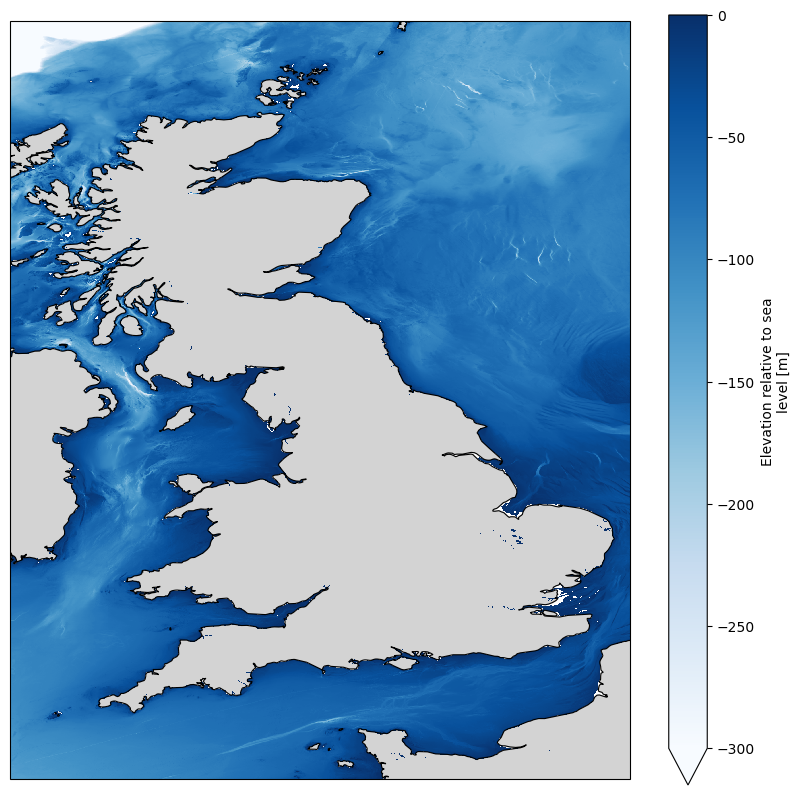

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Select the subset of data
subset_bathy = bathy_ds.sel(lat=slice(49, 60), lon=slice(-7, 2))

# Plot the subset with coastlines and land mask
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title('Subset of Bathymetry Data with Coastlines and Land Mask')

# Plot bathymetry on water only
subset_bathy['elevation'].where(subset_bathy['elevation'] < 0).plot(ax=ax, cmap='Blues', vmin=-300, vmax=0)

# Add coastlines
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

# Add land mask
ax.add_feature(cfeature.LAND, color='lightgray')

# Show the plot
plt.show()


In [2]:
import pandas as pd
stations1950 = pd.read_pickle("../outputs/ESL_10stations1-14_1950.pkl")
stations1950.reset_index(drop=False, inplace=True)
stations1950["date"] = stations1950["index"]

result_df = stations1950[["index", "station", "sea_level", "latitude", "longitude", "ESL_10", "date"]]
# Group by 'station' and calculate the mean of 'sea_level' for each station
result_df['mean_SL_station'] = result_df.dropna().groupby(['latitude', "longitude"])['sea_level'].transform('mean')
result_df = result_df.dropna()

## Topography

## 

In [3]:
import requests
import warnings
# Suppress a specific category of warnings
warnings.filterwarnings("ignore")

wcs_url = "https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open_maplibrary/wcs?SERVICE=WCS&REQUEST=GetCapabilities&VERSION=2.0.1"

# Send a GET request to the WCS GetCapabilities endpoint
response = requests.get(wcs_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Print the response content (XML format)
    print(response.text)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

<?xml version="1.0" encoding="UTF-8"?><wcs:Capabilities xmlns:wcs="http://www.opengis.net/wcs/2.0" xmlns:ows="http://www.opengis.net/ows/2.0" xmlns:gml="http://www.opengis.net/gml/3.2" xmlns:gmlcov="http://www.opengis.net/gmlcov/1.0" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="2.0.1" updateSequence="45574" xmlns:int="http://www.opengis.net/WCS_service-extension_interpolation/1.0" xmlns:crs="http://www.opengis.net/wcs/crs/1.0" xmlns:inspire_common="http://inspire.ec.europa.eu/schemas/common/1.0" xmlns:inspire_dls="http://inspire.ec.europa.eu/schemas/inspire_dls/1.0" xsi:schemaLocation=" http://www.opengis.net/wcs/2.0 http://schemas.opengis.net/wcs/2.0/wcsGetCapabilities.xsd http://inspire.ec.europa.eu/schemas/inspire_dls/1.0 https://inspire.ec.europa.eu/schemas/inspire_dls/1.0/inspire_dls.xsd"><ows:ServiceIdentification><ows:Title>EMODnet Seabed Habitats Map Library WCS Service</ows:Title><ows:Abstract>WCS end-point for indiv

In [4]:
response

<Response [200]>

In [5]:
coverage_data = response.content

In [6]:
coverage_data

b'<?xml version="1.0" encoding="UTF-8"?><wcs:Capabilities xmlns:wcs="http://www.opengis.net/wcs/2.0" xmlns:ows="http://www.opengis.net/ows/2.0" xmlns:gml="http://www.opengis.net/gml/3.2" xmlns:gmlcov="http://www.opengis.net/gmlcov/1.0" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="2.0.1" updateSequence="45574" xmlns:int="http://www.opengis.net/WCS_service-extension_interpolation/1.0" xmlns:crs="http://www.opengis.net/wcs/crs/1.0" xmlns:inspire_common="http://inspire.ec.europa.eu/schemas/common/1.0" xmlns:inspire_dls="http://inspire.ec.europa.eu/schemas/inspire_dls/1.0" xsi:schemaLocation=" http://www.opengis.net/wcs/2.0 http://schemas.opengis.net/wcs/2.0/wcsGetCapabilities.xsd http://inspire.ec.europa.eu/schemas/inspire_dls/1.0 https://inspire.ec.europa.eu/schemas/inspire_dls/1.0/inspire_dls.xsd"><ows:ServiceIdentification><ows:Title>EMODnet Seabed Habitats Map Library WCS Service</ows:Title><ows:Abstract>WCS end-point for ind

#